> 회귀분석(2)-- SSE와 MSE, step1의 다른버전 (torch.nn.Linear)

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

/home/hankang07/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-09-22-regression.csv") 
df

,x,y
0,-2.482113,-8.542024
1,-2.362146,-6.576713
2,-1.997295,-5.949576
3,-1.623936,-4.479364
4,-1.479192,-4.251570
...,...,...
95,2.244400,10.325987
96,2.393501,12.266493
97,2.605604,13.098280
98,2.605658,12.546793


In [16]:
torch.tensor(df.x).dtype # 데이터프레임을 불러오면 좀 더 정밀한 저장이 가능한 float64형태로 불러와짐.

torch.float64

In [22]:
# torch.tensor(df.x,dtype=torch.float32).dtype # 메모리를 아끼기 위해 float32로 저장할 것임.
torch.tensor(df.x).float().dtype # 메소드로도 구현되어 있음.

torch.float32

In [23]:
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
y= torch.tensor(df.y,dtype=torch.float32).reshape(100,1)
X= torch.tensor([[1]*100,x]).T

In [24]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

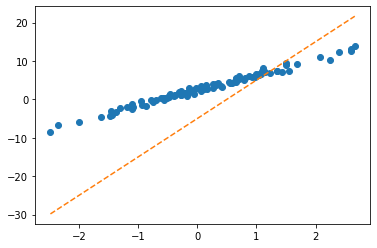

In [25]:
plt.plot(x,y,'o')
#plt.plot(x,-5+10*x,'--')
plt.plot(x,X@What.data,'--')  ## 최초의 선!

## ver1: loss = sum of squares error

In [26]:
alpha = 1/1000
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.sum((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad  # 가중치 업데이트 // # What.grad: 미분계수값 저장되어 있음.
    What.grad = None # 가중치 초기화 (깨끗하게!)

In [29]:
What

tensor([[2.4290],
        [4.0144]], requires_grad=True)

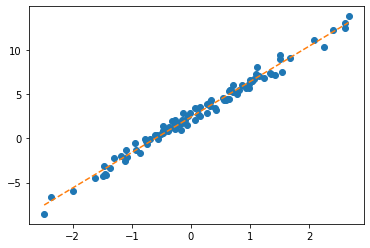

In [30]:
plt.plot(x,y,'o') 
plt.plot(x,X@What.data,'--')

- note: 왜 What = What - alpha*What.grad 는 안되는지?

## ver2: loss = mean squared error = MSE 

In [31]:
alpha = 1/10
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.mean((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None 

In [32]:
What

tensor([[2.4290],
        [4.0144]], requires_grad=True)

# step1의 다른버전: torch.nn.Linear()

## ver1: bias=True

> **net = torch.nn.Linear(1,1,bias=True)**

$X$가 수식적이 변환을 거처서 $\hat{y}$라는게 나오게 될텐데 그것을 네트워크라고 정의한다. 
```
X -> yhat
yhat = w0 + w1*x
net(x) = yhat ## 이런 구조로 만들 것임.
```
w0 + w1*x같은 수식을 매번 안쳐도 됨!! $\to$ 파이토치에서 구현이 되어있음!

In [34]:
# torch.nn.Linear?

In [37]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1, out_features=1, bias=True) 

In [40]:
net

Linear(in_features=1, out_features=1, bias=True)

`-` 초기 plot1 (네트워크로 만듦)

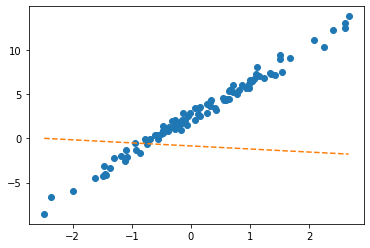

In [41]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

`-` 초기 plot2 (수식으로 만듦: yhat = w0+w1*x)

In [42]:
net.bias, net.weight

(Parameter containing:
 tensor([-0.8470], requires_grad=True),
 Parameter containing:
 tensor([[-0.3467]], requires_grad=True))

- 네트워크가 만들어질 때 net.bias, net.weight에 아무값이나 들어있음..

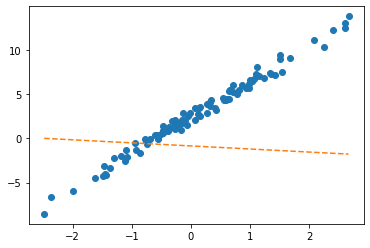

In [43]:
# 위의 그래프와 똑같음.
plt.plot(x,y,'o')
plt.plot(x,-0.8470-0.3467*x,'--')

`-` net에서 $\hat{w}_0, \hat{w}_1$ 의 값은? 

In [44]:
net.weight # w1 

Parameter containing:
tensor([[-0.3467]], requires_grad=True)

In [45]:
net.bias # w0 

Parameter containing:
tensor([-0.8470], requires_grad=True)

In [46]:
_yhat = -0.8470 + -0.3467*x 

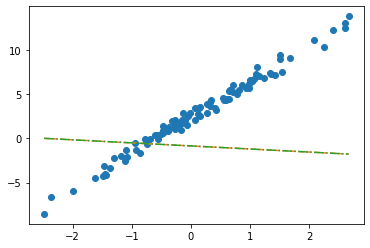

In [47]:
plt.plot(x,y,'o')
plt.plot(x, _yhat,'--')
plt.plot(x,net(x).data,'-.')

`-` 수식표현: $\hat{y}_i = \hat{w}_0 + \hat{w}_1 x_i = \hat{b} + \hat{w}x_i =  -0.8470 + -0.3467 x_i$ for all $i=1,2,\dots,100$. 

## ver2

`-` 입력이 x가 아닌 X를 넣고 싶다면? (보통 잘 안하긴 해요, 왜? bias=False로 주는게 귀찮거든요)
- X는 바이어스가 고려된 상황 

In [48]:
net(X) ## 그대로 쓰면 당연히 에러

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x2 and 1x1)

In [50]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2, out_features=1, bias=False) 

In [51]:
net.weight

Parameter containing:
tensor([[-0.2451, -0.5989]], requires_grad=True)

$w_0 = -0.2451, \quad w_1 =  -0.5989$

In [52]:
net.bias # bias=False로 했기때문에 아무것도 없음.

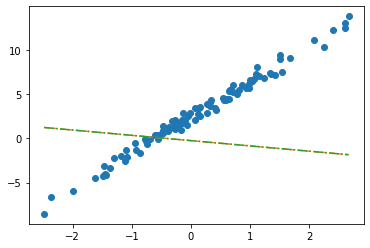

In [53]:
plt.plot(x,y,'o') 
plt.plot(x,net(X).data, '--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]]), '-.')

`-` 수식표현: $\hat{\bf y} = {\bf X} {\bf \hat W} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix}  \begin{bmatrix} -0.2451 \\ -0.5989  \end{bmatrix}$

## 잘못된사용1

In [54]:
_x = x.reshape(-1) # length=100인 벡터.

In [55]:
_x

tensor([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.66

In [56]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1,out_features=1) 

In [57]:
net(_x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100 and 1x1)

## 잘못된사용2

> 이건 에러메세지는 안나지만 틀림.

In [127]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2,out_features=1) # bias=False를 깜빡..

In [128]:
net.weight

Parameter containing:
tensor([[-0.2451, -0.5989]], requires_grad=True)

In [129]:
net.bias

Parameter containing:
tensor([0.2549], requires_grad=True)

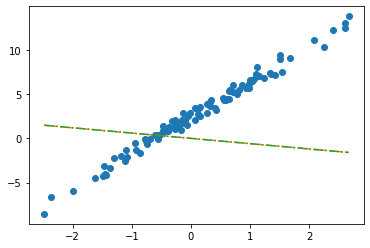

In [133]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]])+0.2549,'-.')

- 수식표현: $\hat{\bf y} = {\bf X} {\bf \hat W} + \hat{b}= \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix}  \begin{bmatrix} -0.2451 \\ -0.5989  \end{bmatrix} + 0.2549$

# 숙제 

`(1)` 자신의 학번을 seed로 설정하고 표준정규분포에서 5개의 난수를 생성하고 순서대로 정렬한 뒤 이를 `x`로 저장하라. (아래코드참고)

```python
torch.manual_seed(202043052) 
x,_ = torch.randn(5).sort()
```

`(2)` 아래와 같이 torch.nn.Linear()를 이용하여 적당한 네트워크를 생성하고 "최초의 직선" $\hat{y}_i$가 아래와 같이 구해지도록 `net.weight` 혹은 `net.bias`의 값을 수정하라. 

$$ \hat{y}_i = 2.5 x_i - 7, \quad i=1,2,3,4,5 $$ 

단, $x_1,x_2,\dots,x_5$는 `x`의 원소이다. 

> note: 공부를 위해서 bias를 넣은 버전과 넣지 않는 버전 모두 계산해 보세요. (숙제제출은 한 방법으로만 구현해도 무방) 

***(풀이 시작)***

In [69]:
import random
random_id = random.randint(100000000,999999999)
random_id

869206177

In [70]:
torch.manual_seed(random_id)
x,_ = torch.rand(5).sort()
x = x.reshape(-1,1)
X = torch.concat([torch.ones(5).reshape(-1,1),x],axis=1)

## ver1. bias=True

In [81]:
net1 = torch.nn.Linear(in_features=1, out_features=1,bias=True)
net1.weight.data, net1.bias.data # 네트워크에 들어있는 초기값.

(tensor([[0.1441]]), tensor([-0.8133]))

In [98]:
net1.weight.data = torch.tensor([[2.5]]) # dim 맞춰주기위한 작업 // torch.tensor([2.5]).reshape(-1,1).shape -> torch.Size([1,1])
net1.bias.data = torch.tensor([-7.0]) # 얜 스칼라니까..
net1.weight.data.shape, net1.bias.shape

(torch.Size([1, 1]), torch.Size([1]))

In [100]:
net1(x), 2.5*x-7.0

(tensor([[-6.8399],
         [-6.2981],
         [-6.2541],
         [-5.9748],
         [-5.7316]], grad_fn=<AddmmBackward0>),
 tensor([[-6.8399],
         [-6.2981],
         [-6.2541],
         [-5.9748],
         [-5.7316]]))

## ver2. bias=False

In [107]:
net2 = torch.nn.Linear(in_features=1, out_features=2, bias=False)
net2.weight.data, net2.bias

(tensor([[-0.2855],
         [-0.4631]]),
 None)

In [109]:
net2.weight.data = torch.tensor([[-7.0, 2.5]])
net2.weight.data.shape

torch.Size([1, 2])

In [113]:
net2(X), 2.5*x-7.0

(tensor([[-6.8399],
         [-6.2981],
         [-6.2541],
         [-5.9748],
         [-5.7316]], grad_fn=<MmBackward0>),
 tensor([[-6.8399],
         [-6.2981],
         [-6.2541],
         [-5.9748],
         [-5.7316]]))

---

***(모범답안)***

In [34]:
torch.manual_seed(202043052) 
x,_ = torch.randn(5).sort()
x = x.reshape(-1,1)
X = torch.concat([torch.ones(5).reshape(-1,1),x],axis=1)

In [36]:
x,X

(tensor([[-2.9777],
         [-0.2220],
         [-0.1181],
         [ 0.1084],
         [ 1.7688]]),
 tensor([[ 1.0000, -2.9777],
         [ 1.0000, -0.2220],
         [ 1.0000, -0.1181],
         [ 1.0000,  0.1084],
         [ 1.0000,  1.7688]]))

**(ver1) bias를 넣음**

In [45]:
net1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
net1.weight.data, net1.bias.data

(tensor([[0.0092]]), tensor([0.1899]))

In [46]:
net1.weight.data = torch.tensor([[2.5]])
net1.bias.data = torch.tensor([-7.0])
net1.weight.data, net1.bias.data

(tensor([[2.5000]]), tensor([-7.]))

In [47]:
net1(x), 2.5*x-7

(tensor([[-14.4443],
         [ -7.5551],
         [ -7.2952],
         [ -6.7290],
         [ -2.5781]], grad_fn=<AddmmBackward0>),
 tensor([[-14.4443],
         [ -7.5551],
         [ -7.2952],
         [ -6.7290],
         [ -2.5781]]))

**(ver2) bias를 넣지 않음**

In [48]:
net2=torch.nn.Linear(in_features=2,out_features=1,bias=False) 
net2.weight.data, net2.bias

(tensor([[-0.6152, -0.6372]]), None)

In [49]:
net2.weight.data = torch.tensor([[-7.0, 2.5]])
net2.weight.data

tensor([[-7.0000,  2.5000]])

In [51]:
net2(X), 2.5*x-7

(tensor([[-14.4443],
         [ -7.5551],
         [ -7.2952],
         [ -6.7290],
         [ -2.5781]], grad_fn=<MmBackward0>),
 tensor([[-14.4443],
         [ -7.5551],
         [ -7.2952],
         [ -6.7290],
         [ -2.5781]]))